# ANALYSIS #

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotnine as p9
import cpi

In [2]:
cpi.update()

%matplotlib inline
plt.style.use("ggplot") 

In [3]:
%run DataPreparation.ipynb

In [4]:
p_data = Process_Data()
p_data.add_modified_dataframe()
data = p_data.modified

14037


## Barplot of approximate price per piece in $ ##

**Filter out lego products and sets with unconvetional parts**

In [5]:
avg_piece_price_data = data[(data.Pieces != 0) 
                            & (np.isnan(data.Pieces) == False) 
                            & (np.isnan(data.USD_MSRP) == False)
                            & (data.Theme != "Mindstorms") #sets with motorized and techincal parts
                            & (data.Theme != "Education") #sets with motorized and techincal parts
                            & (data.Theme != "Power Functions")  #sets with motorized and techincal parts
                            & (data.Theme != "Powered Up")  #sets with motorized and techincal parts
                            & (data.Theme != "Duplo") #large pieces for smaller children
                            & (data.Theme != "DUPLO") #large pieces for smaller children
                            & (data.Subtheme != "Road Plates") #large plates for placing bricks onto
                            & (data.Subtheme != "Baseplates") #large plates for placing bricks onto
                            & (data.Theme != "Bricks and More") #large plates for placing bricks onto
                            & (data.Theme != "Books") #books
                            & (data.Theme != "Gear") #accessories
                           ]

**Calculate average price per piece for each year where there are more than 20 sets in the data, that have a manufacturer suggested retail price**

In [6]:
years = avg_piece_price_data.Year.unique()
relevant_years = []
avg_price = []
for year in years:
    pieces_and_msrp = avg_piece_price_data[avg_piece_price_data.Year == year][["Name", "Pieces", "USD_MSRP"]]
    if pieces_and_msrp.shape[0] > 20:
        avg_piece_price_per_set = [row[1].USD_MSRP / row[1].Pieces for row in pieces_and_msrp.iterrows()]
        avg_price.append(round(np.mean(avg_piece_price_per_set), 2))
        relevant_years.append(year)

**Generate barplot**

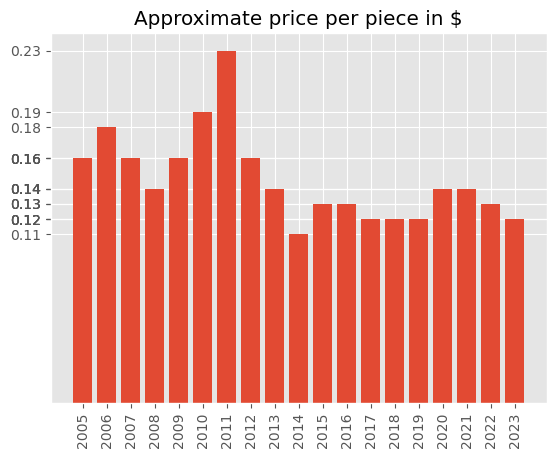

In [7]:
plt.title("Approximate price per piece in $")
plt.bar(relevant_years, avg_price)
plt.xticks(relevant_years, rotation='vertical')
plt.yticks(avg_price)
plt.show()

## Barplot of inflation adjusted approximate price per piece in $ ##

**Adjust avarage pieces per piece for inflation**

In [8]:
for i in range(len(avg_price)):
    if relevant_years[i] != 2023:
        avg_price[i] = round(cpi.inflate(avg_price[i], relevant_years[i]), 2)

**Generate barplot**

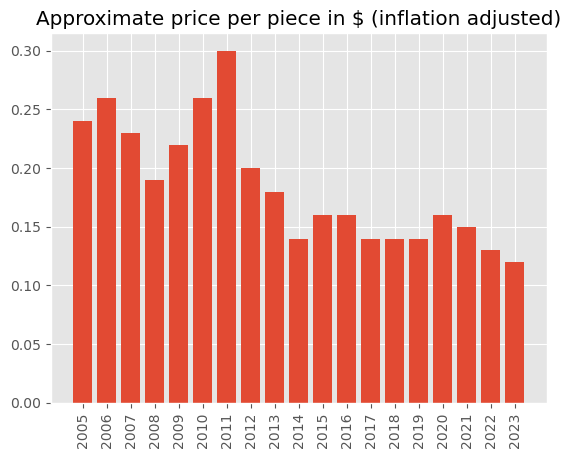

In [9]:
plt.title("Approximate price per piece in $ (inflation adjusted)")
plt.bar(relevant_years, avg_price)
plt.xticks(relevant_years, rotation='vertical')
plt.show()

## Scatterplot of piece counts of sets throughout years ##

**Filter out lego products without pieces**

In [10]:
piece_counts_data = data[(data.Pieces != 0) 
                            & (pd.isna(data.Pieces) == False)
                            & (pd.isna(data.Theme_Group) == False)
                            & (data.Theme != "Books") #books
                            & (data.Theme != "Gear") #accessories
                           ]

**Generate plot with plotnine**

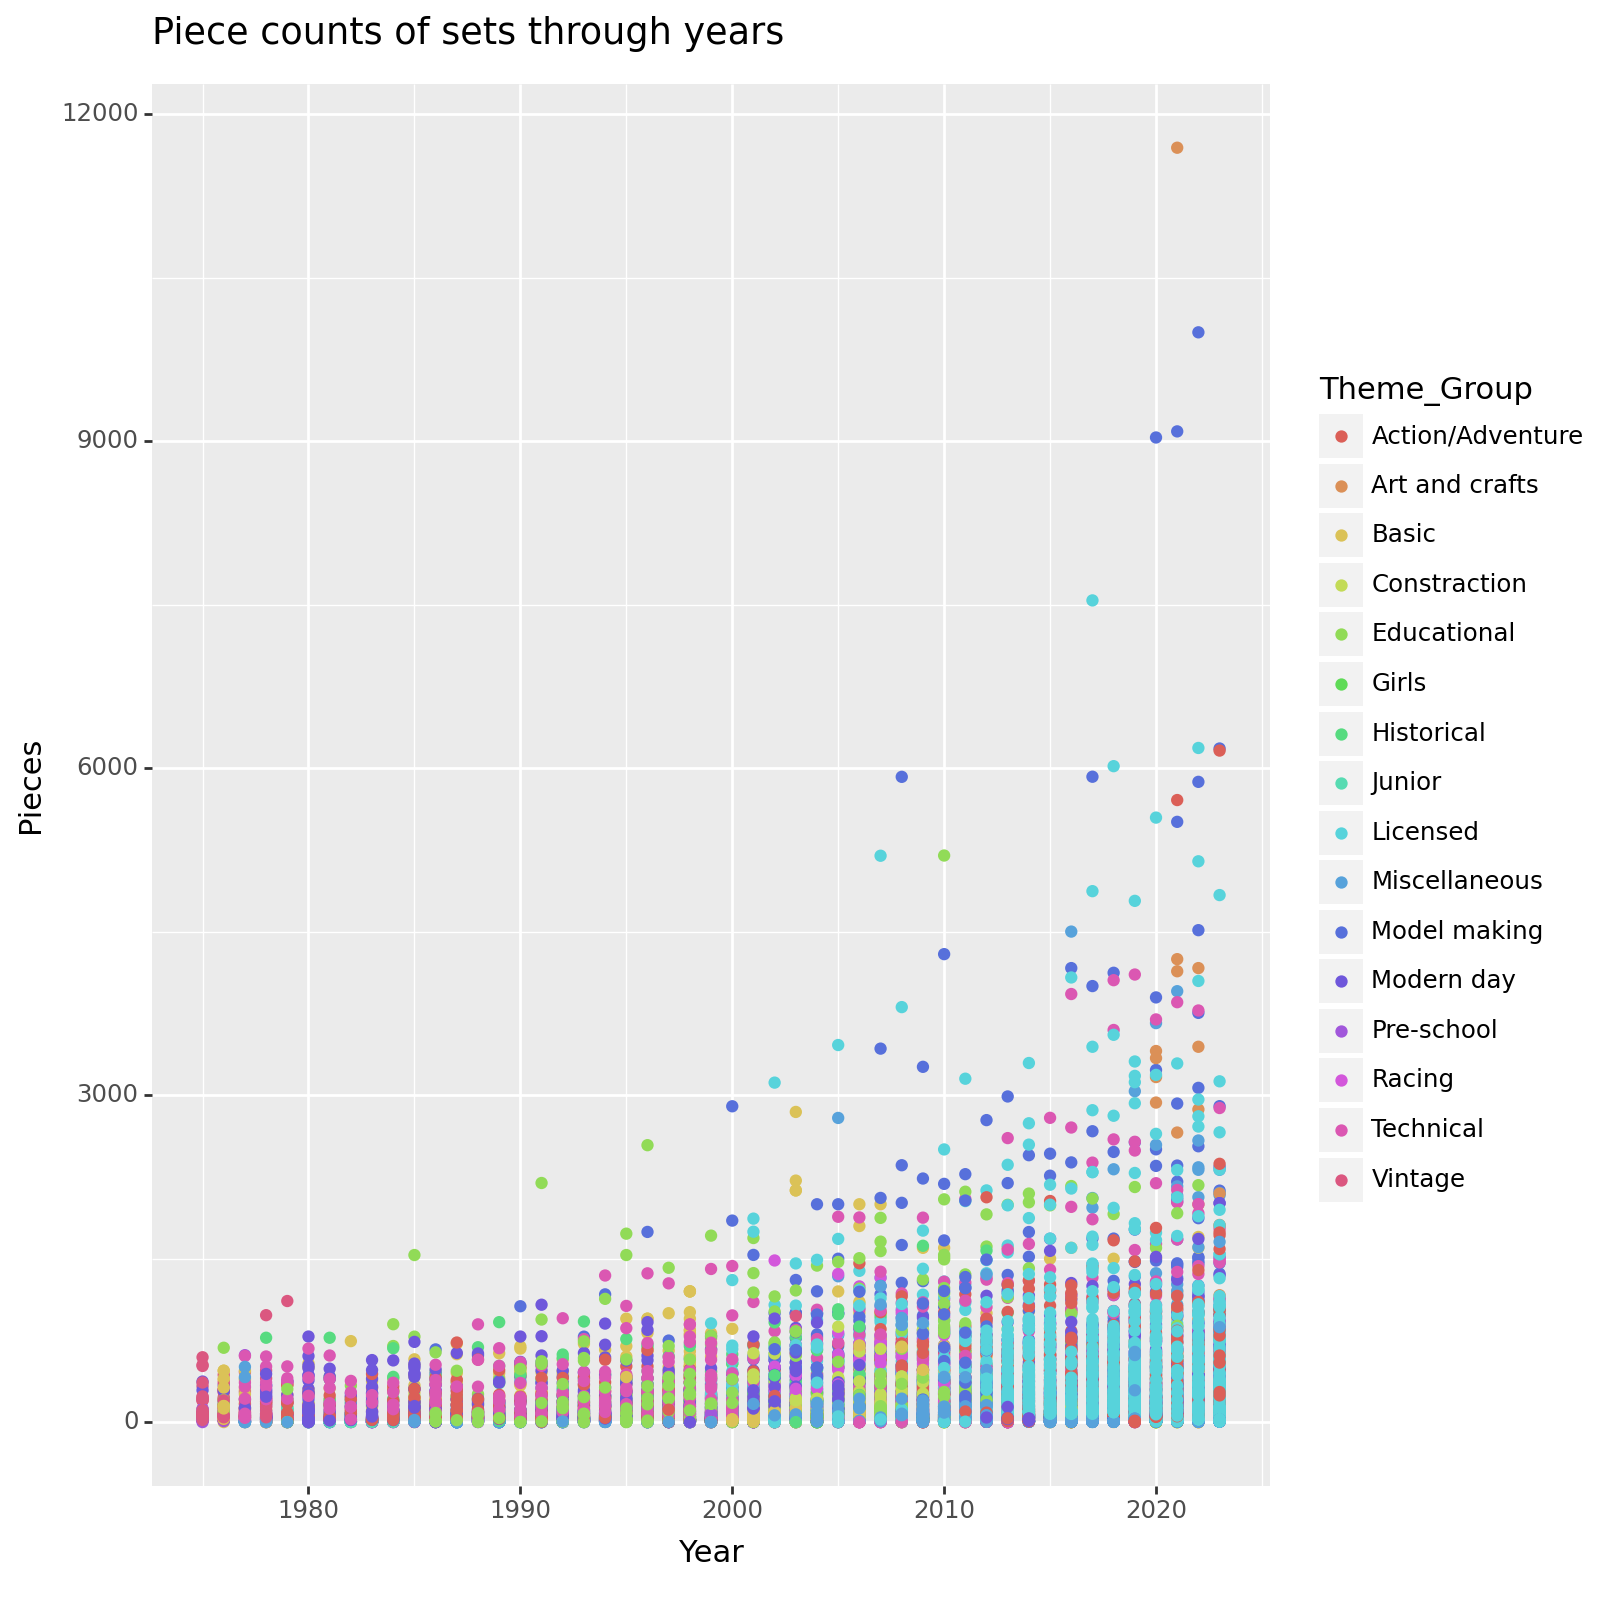

<Figure Size: (800 x 800)>

In [11]:
(p9.ggplot(
    data = piece_counts_data, 
    mapping = p9.aes(x = 'Year', y = "Pieces", color = "Theme_Group")
 )+ 
    p9.geom_point() + 
    p9.ggtitle("Piece counts of sets through years") + 
    p9.theme(figure_size=(8, 8)))

## Average price in $ of sets by minifigure counts ##

**Filter out lego prducts with no minifigures**

In [12]:
price_per_minifigures = data[(data.Minifigures > 0) & (pd.isna(data.USD_MSRP) == False) & (pd.isna(data.USD_MSRP) == False)]

**Calculate average price per minifigure count**

In [13]:
sorted_minifig_values = np.sort(price_per_minifigures.Minifigures.unique())

average_price = []
average_price_inflation_adjusted = []

for minifig in sorted_minifig_values:
    
    prices_per_minifigure_count = []
    for row in price_per_minifigures[price_per_minifigures.Minifigures == minifig].iterrows():
        prices_per_minifigure_count.append(row[1].USD_MSRP)
    average_price.append(round(np.mean(prices_per_minifigure_count), 2))
    
    prices_per_minifigure_count_inflation_adjusted = []
    for row in price_per_minifigures[price_per_minifigures.Minifigures == minifig].iterrows():
        price = cpi.inflate(row[1].USD_MSRP, row[1].Year) if row[1].Year != 2023 else row[1].USD_MSRP
        prices_per_minifigure_count_inflation_adjusted.append(price)
    average_price_inflation_adjusted.append(round(np.mean(prices_per_minifigure_count_inflation_adjusted), 2))

**Generate plots**

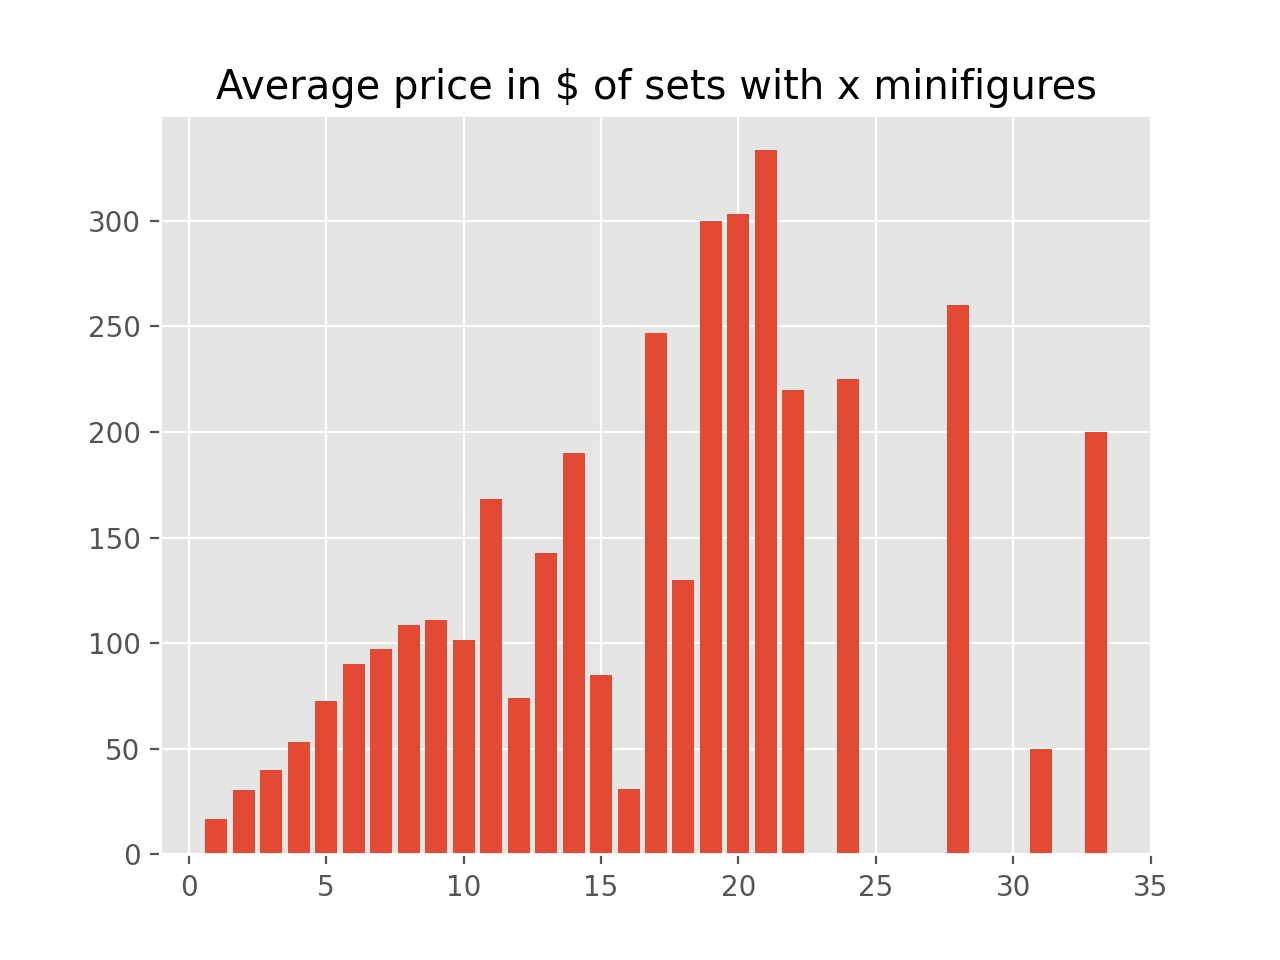

In [14]:
plt.title("Average price in $ of sets with x minifigures")
plt.bar(sorted_minifig_values, average_price)
plt.show()

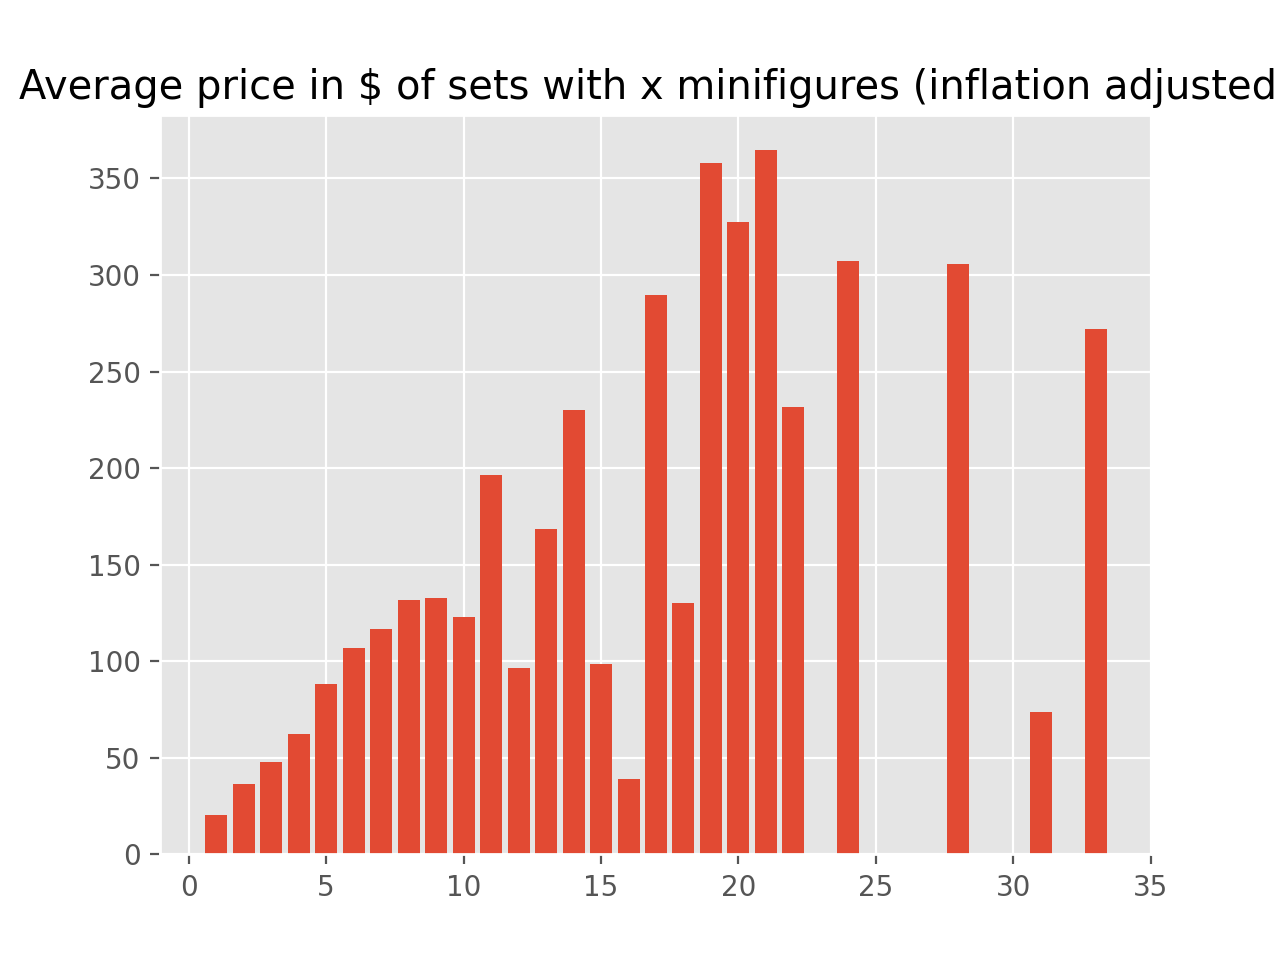

In [15]:
plt.title("Average price in $ of sets with x minifigures (inflation adjusted)")
plt.bar(sorted_minifig_values, average_price_inflation_adjusted)
plt.show()

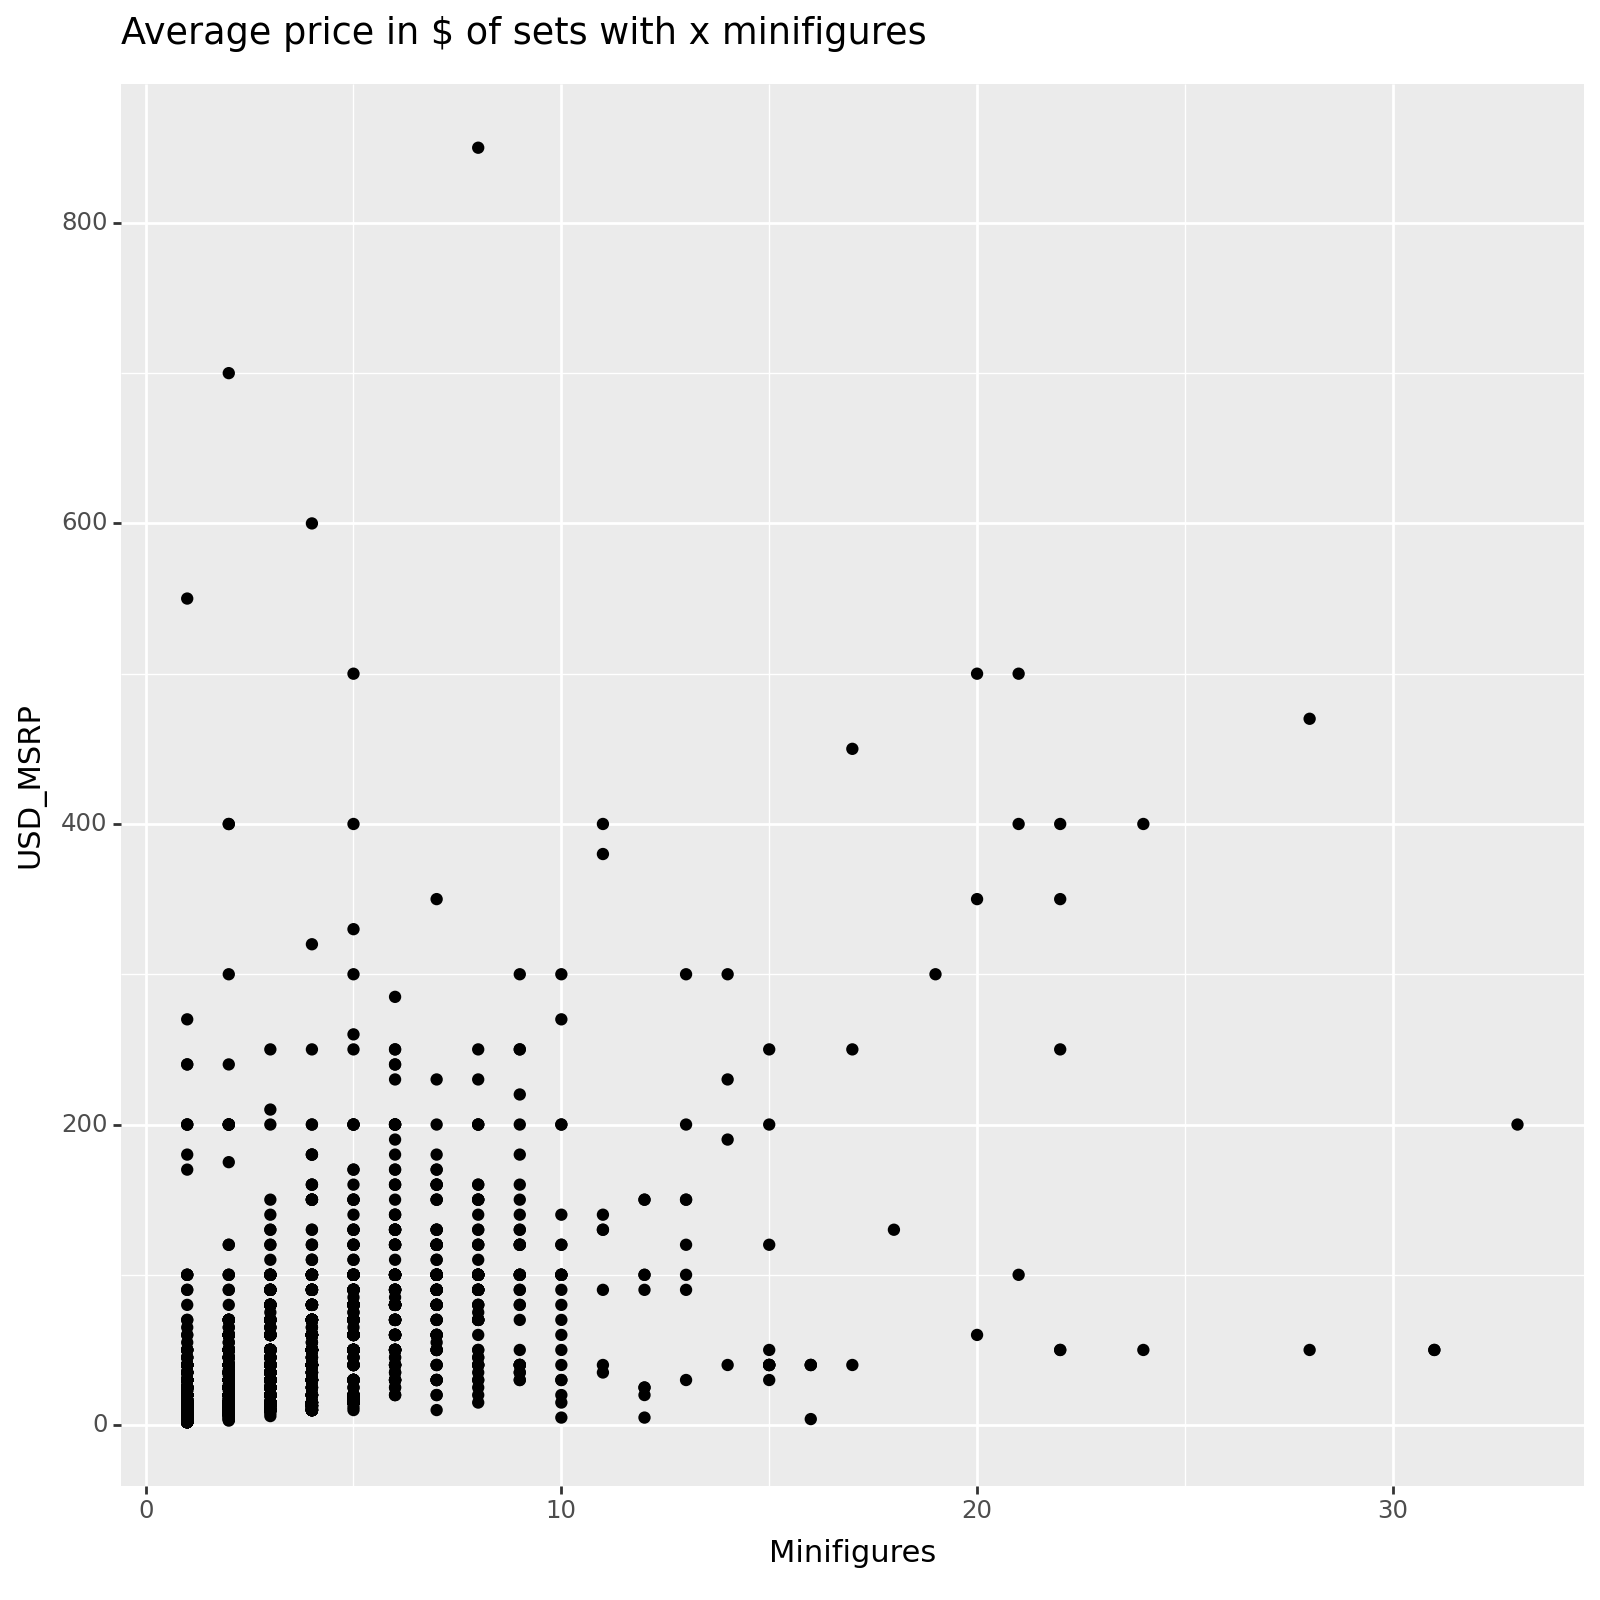

<Figure Size: (800 x 800)>

In [16]:
(p9.ggplot(
    data = price_per_minifigures, 
    mapping = p9.aes(x = 'Minifigures', y = "USD_MSRP")
 )+ 
    p9.geom_point() + 
    p9.ggtitle("Average price in $ of sets with x minifigures") + 
    p9.theme(figure_size=(8, 8)))

## Owned sets by theme group ##

In [17]:
owned_product_data = data[(pd.isna(data.Owned) == False) & (pd.isna(data.Theme) == False) & (pd.isna(data.Theme_Group) == False)]

In [18]:
theme_groups = owned_product_data.Theme_Group.unique()
owned_product_counts = []
for t_group in theme_groups:
    owned_product_counts.append(owned_product_data[owned_product_data.Theme_Group == t_group].Owned.sum())

**Generate plots**

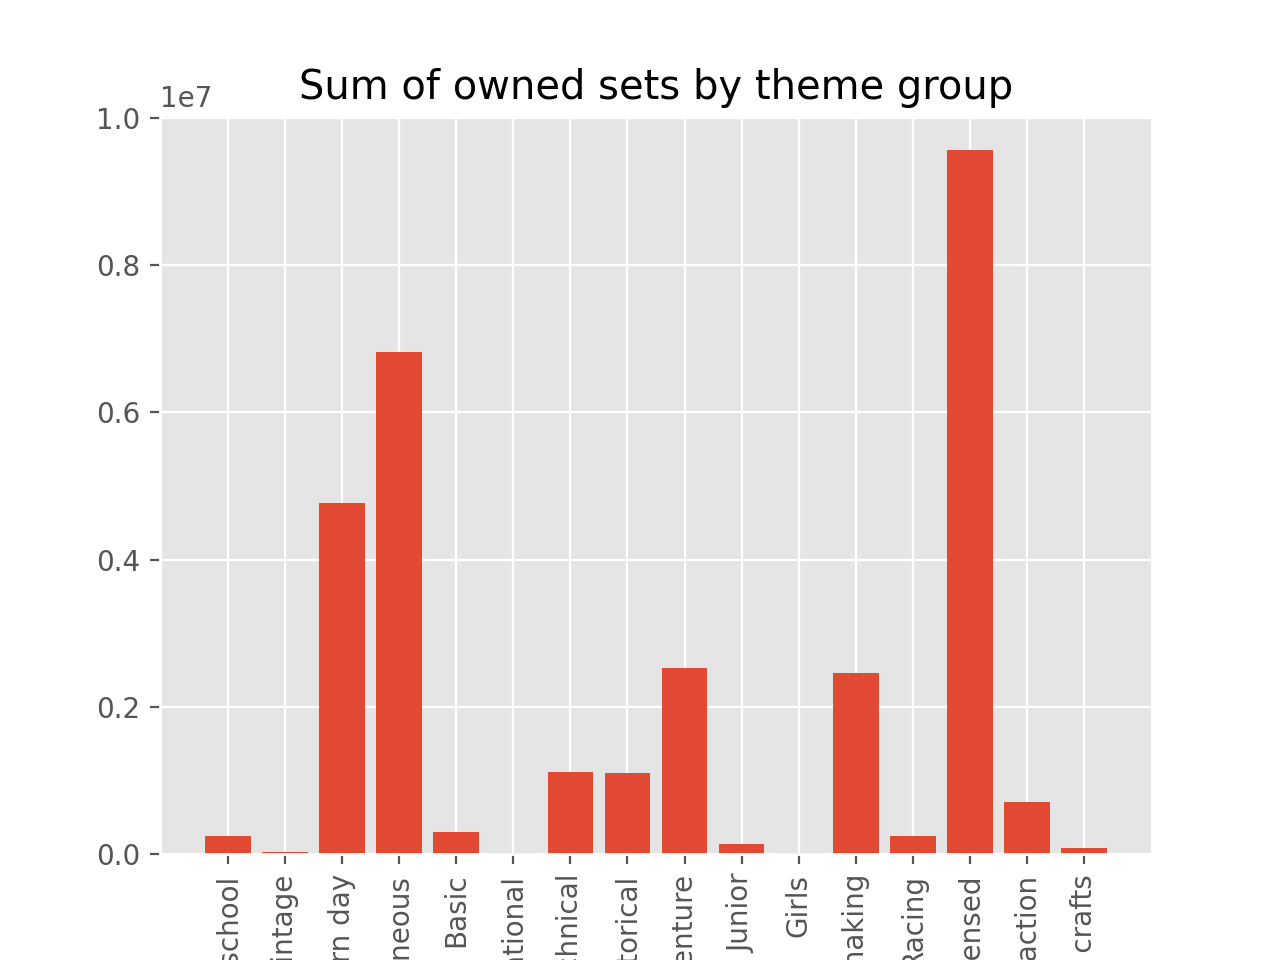

In [19]:
plt.title("Sum of owned sets by theme group")
plt.bar(theme_groups, owned_product_counts)
plt.xticks(theme_groups, rotation='vertical')
plt.rcParams["figure.figsize"] = (8,4)
plt.show()

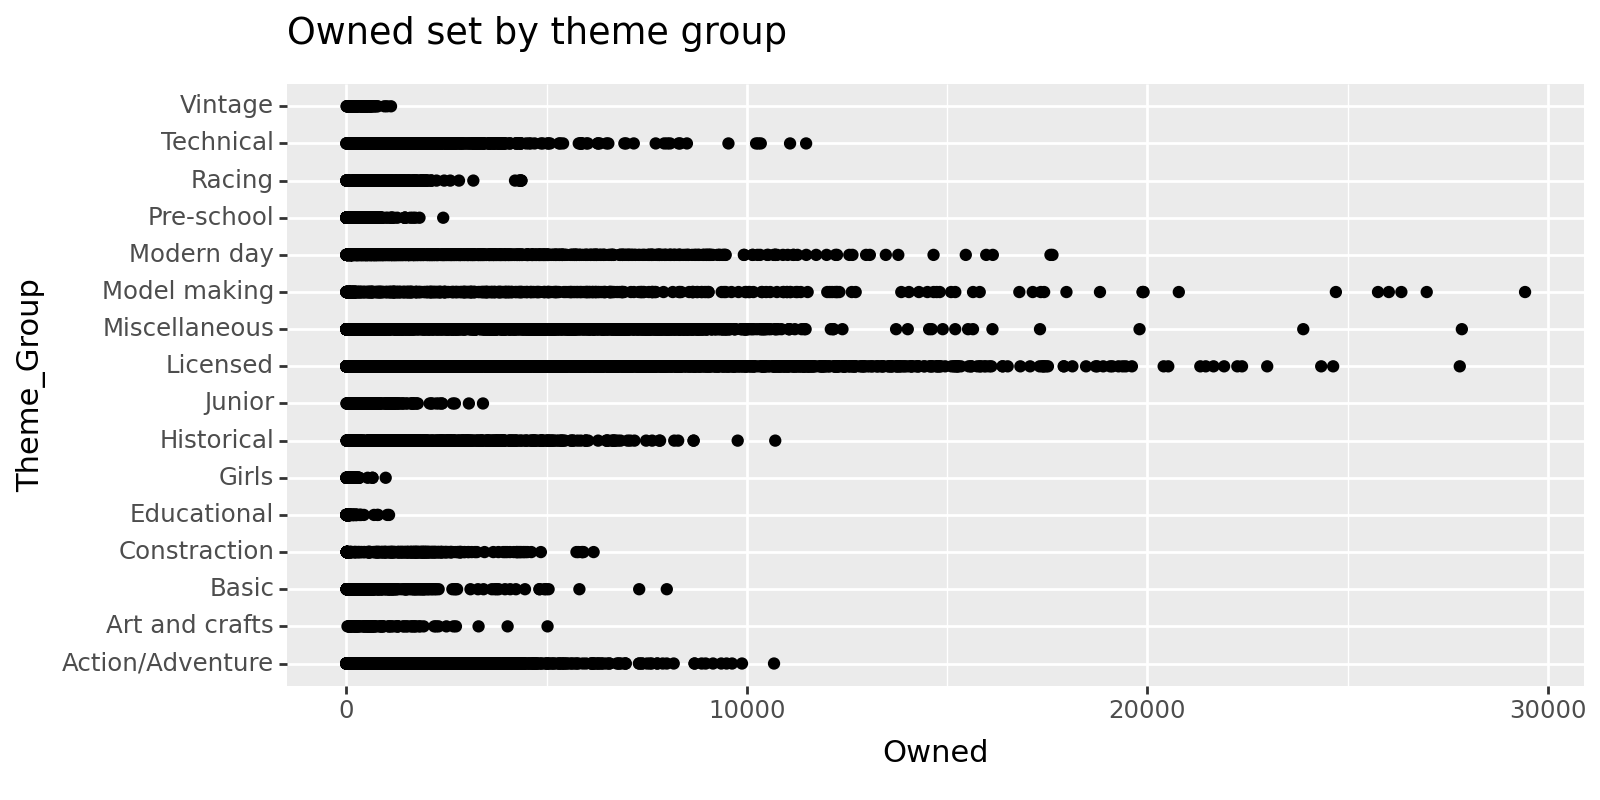

<Figure Size: (800 x 400)>

In [20]:
(p9.ggplot(
    data = owned_product_data, 
    mapping = p9.aes(x = 'Owned', y = "Theme_Group")
 )+ 
    p9.geom_point() + 
    p9.ggtitle("Owned set by theme group") + 
    p9.theme(figure_size=(8, 4)))

C:\Users\hents\AppData\Local\Temp\ipykernel_47152\1163537870.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator


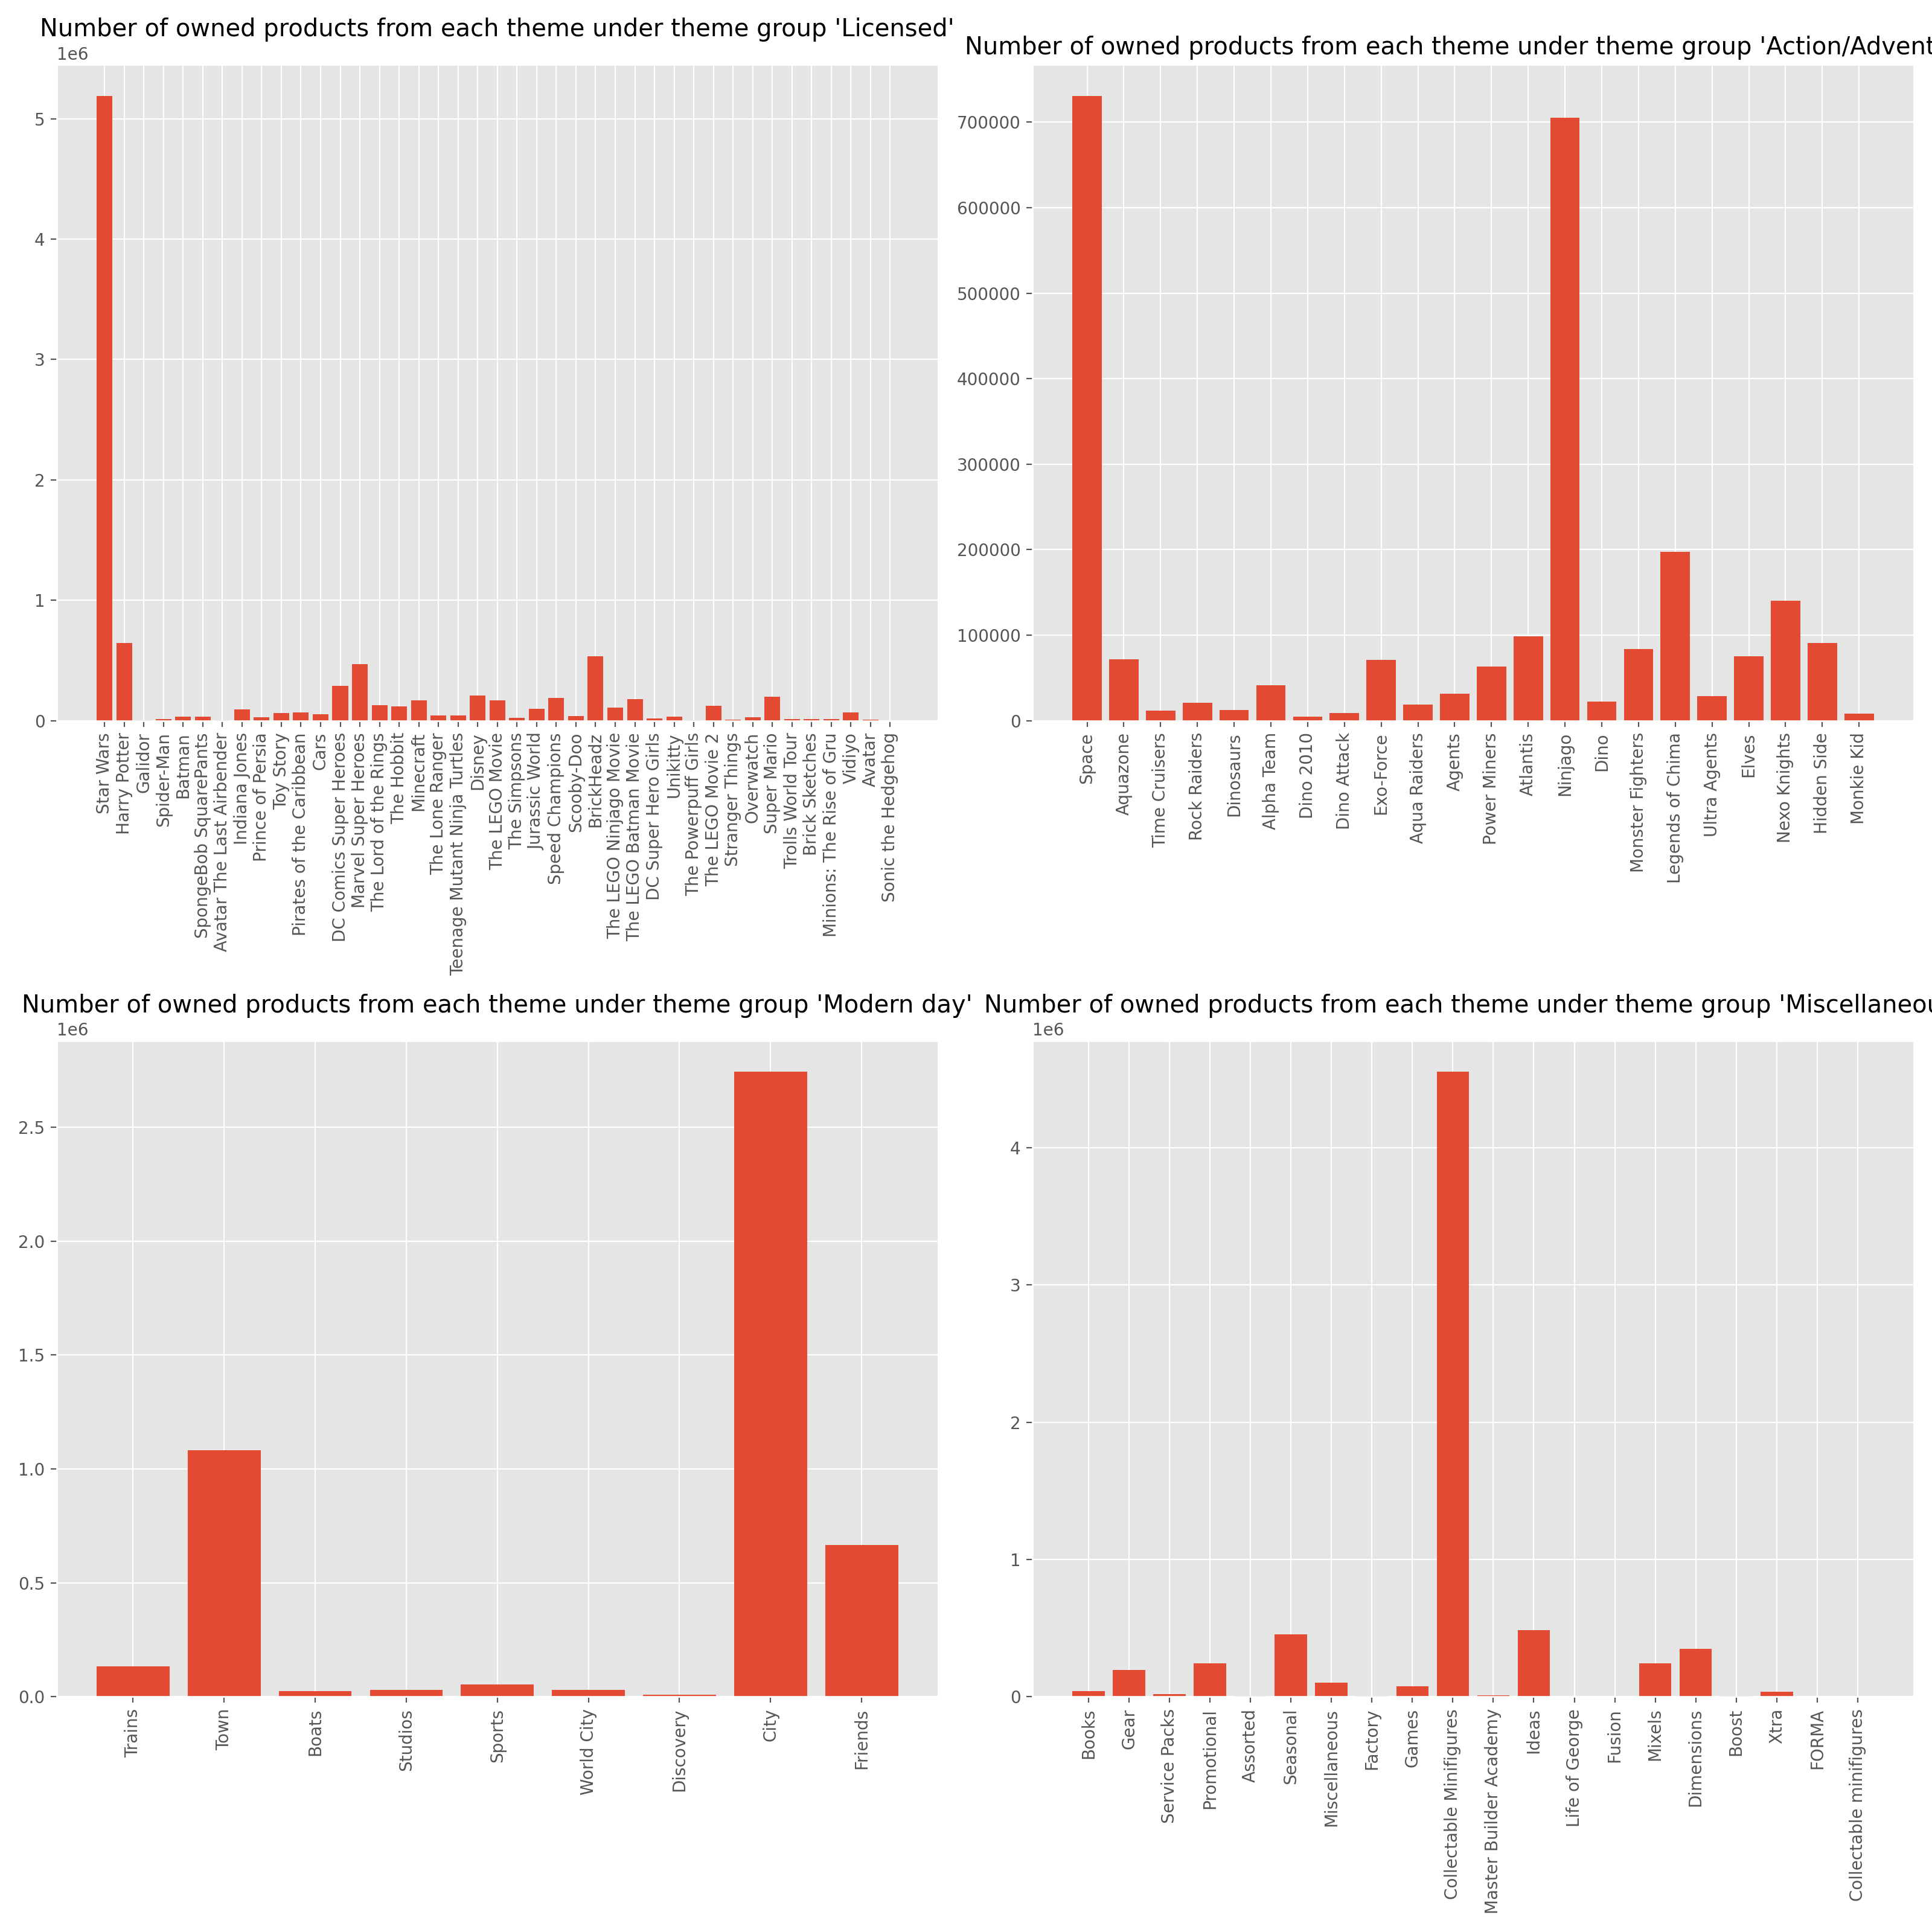

In [21]:
most_popular_theme_groups = ["Licensed", "Action/Adventure", "Modern day", "Miscellaneous"]
    
plt.figure(figsize=[16, 16]) 

i = 221
for theme_group in most_popular_theme_groups:
    themes = owned_product_data[owned_product_data.Theme_Group == theme_group].Theme.unique()
    owned_product_counts = []
    for theme in themes:
        owned_product_counts.append(owned_product_data[owned_product_data.Theme == theme].Owned.sum())
    ax = plt.subplot(i)
    ax.bar(themes, owned_product_counts)
    ax.set_title("Number of owned products from each theme under theme group '" + theme_group + "'")
    ax.set_xticklabels(themes, rotation="vertical")
    i += 1 
    
plt.tight_layout() 

## Resale value of sets  ##

In [22]:
resale_data = data[(pd.isna(data.Current_Price) == False) & (pd.isna(data.Theme) == False) & (pd.isna(data.USD_MSRP) == False)]

**Generate plots**

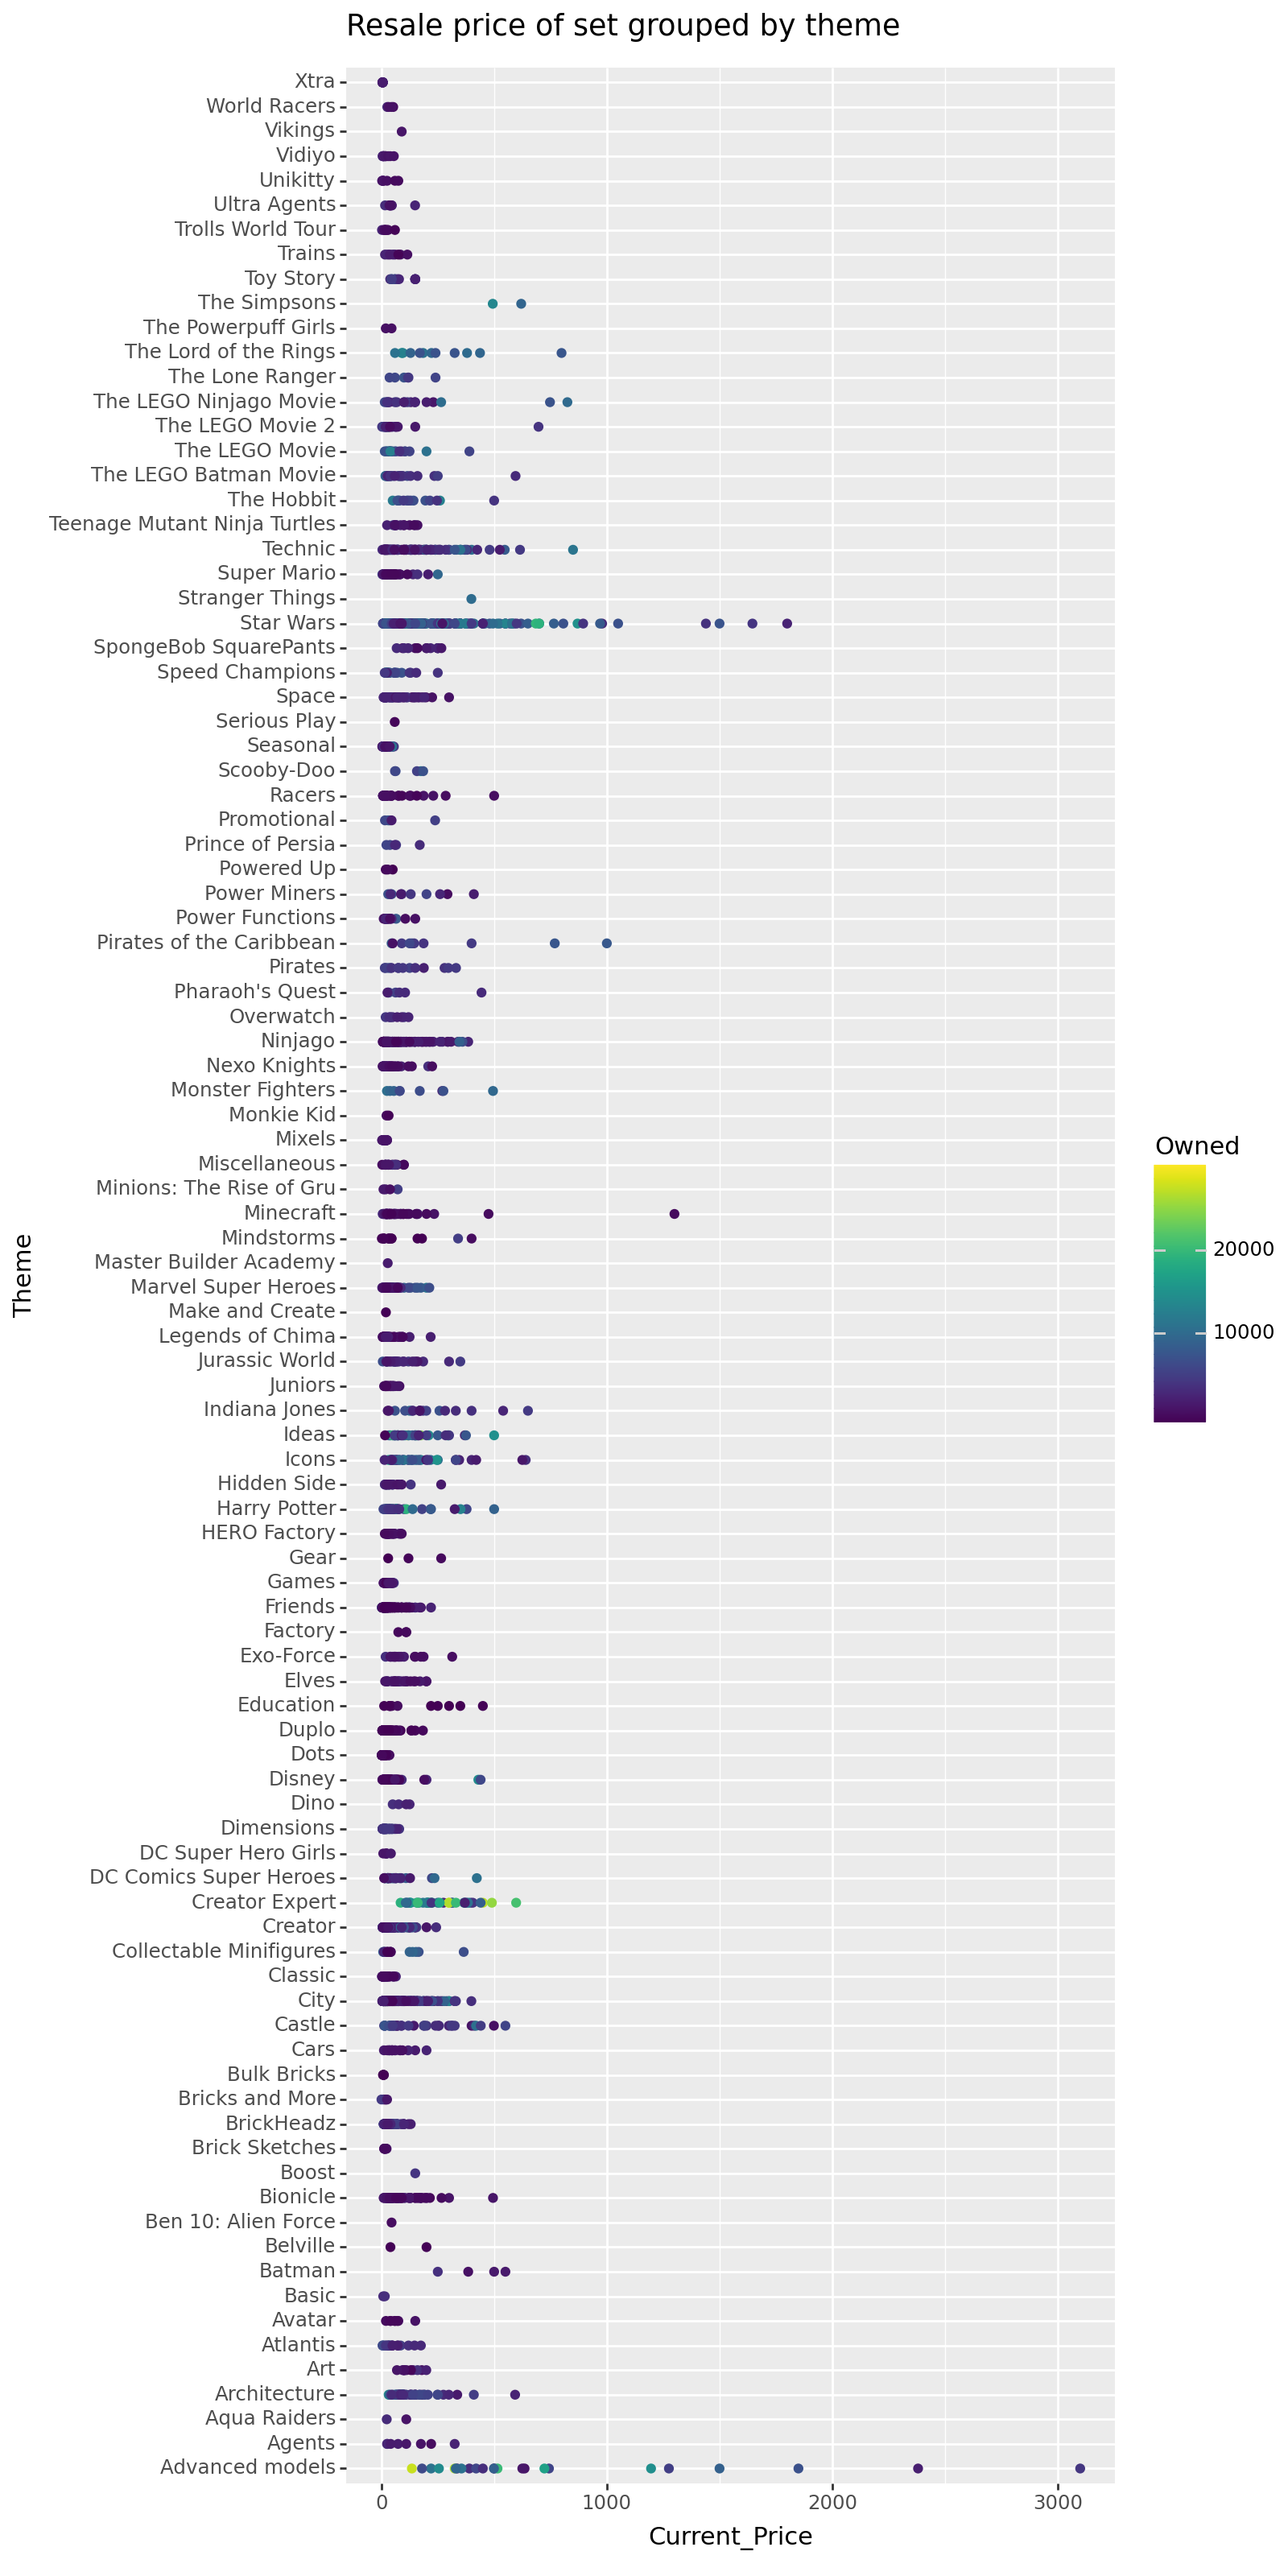

<Figure Size: (800 x 1600)>

In [23]:
(p9.ggplot(
    data = resale_data, 
    mapping = p9.aes(x = 'Current_Price', y = "Theme", color = 'Owned')
 )+ 
    p9.geom_point() + 
    p9.ggtitle("Resale price of set grouped by theme") + 
    p9.theme(figure_size=(8, 16)))

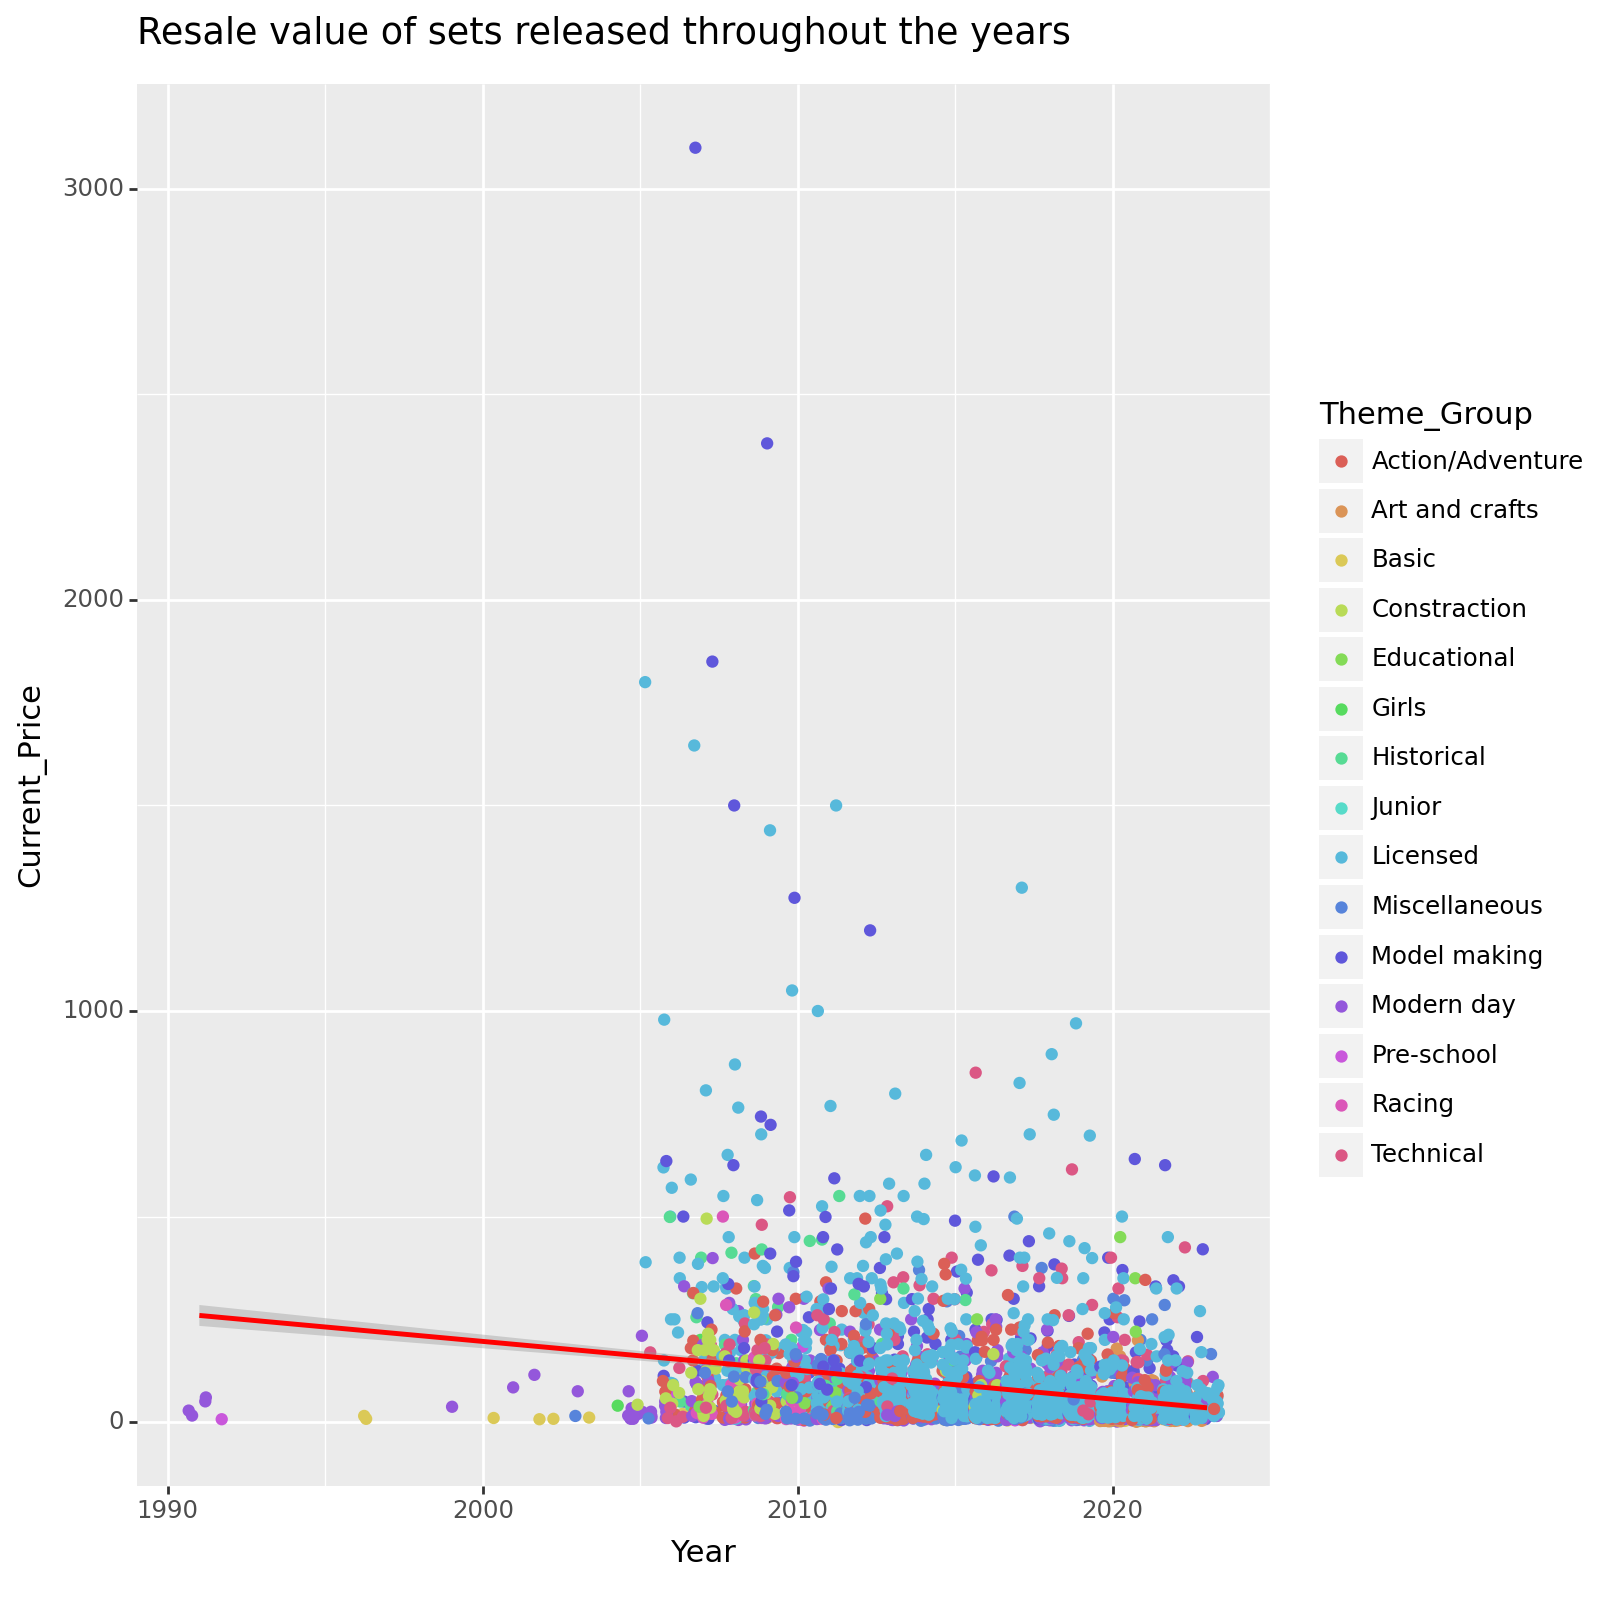

<Figure Size: (800 x 800)>

In [24]:
(p9.ggplot(
    data = resale_data, 
    mapping = p9.aes(x = 'Year', y = "Current_Price", color = 'Theme_Group')
 )+ 
    p9.geom_point(position = 'jitter') +
    p9.geom_smooth(method = 'lm', color = 'red') + 
    p9.ggtitle("Resale value of sets released throughout the years") + 
    p9.theme(figure_size=(8, 8)))

## Resale value of collectable minifigures  ##

In [25]:
minifigures_data = data[(data.Theme == 'Collectable Minifigures') 
                        & (data.Packaging == 'Foil pack') 
                        & (pd.isna(data.Current_Price) == False)
                       ][['Name', 'Year', 'Current_Price', 'Packaging']]

C:\Users\hents\anaconda3\envs\IDS\Lib\site-packages\plotnine\stats\smoothers.py:330: PlotnineWarning: Confidence intervals are not yet implemented for lowess smoothings.


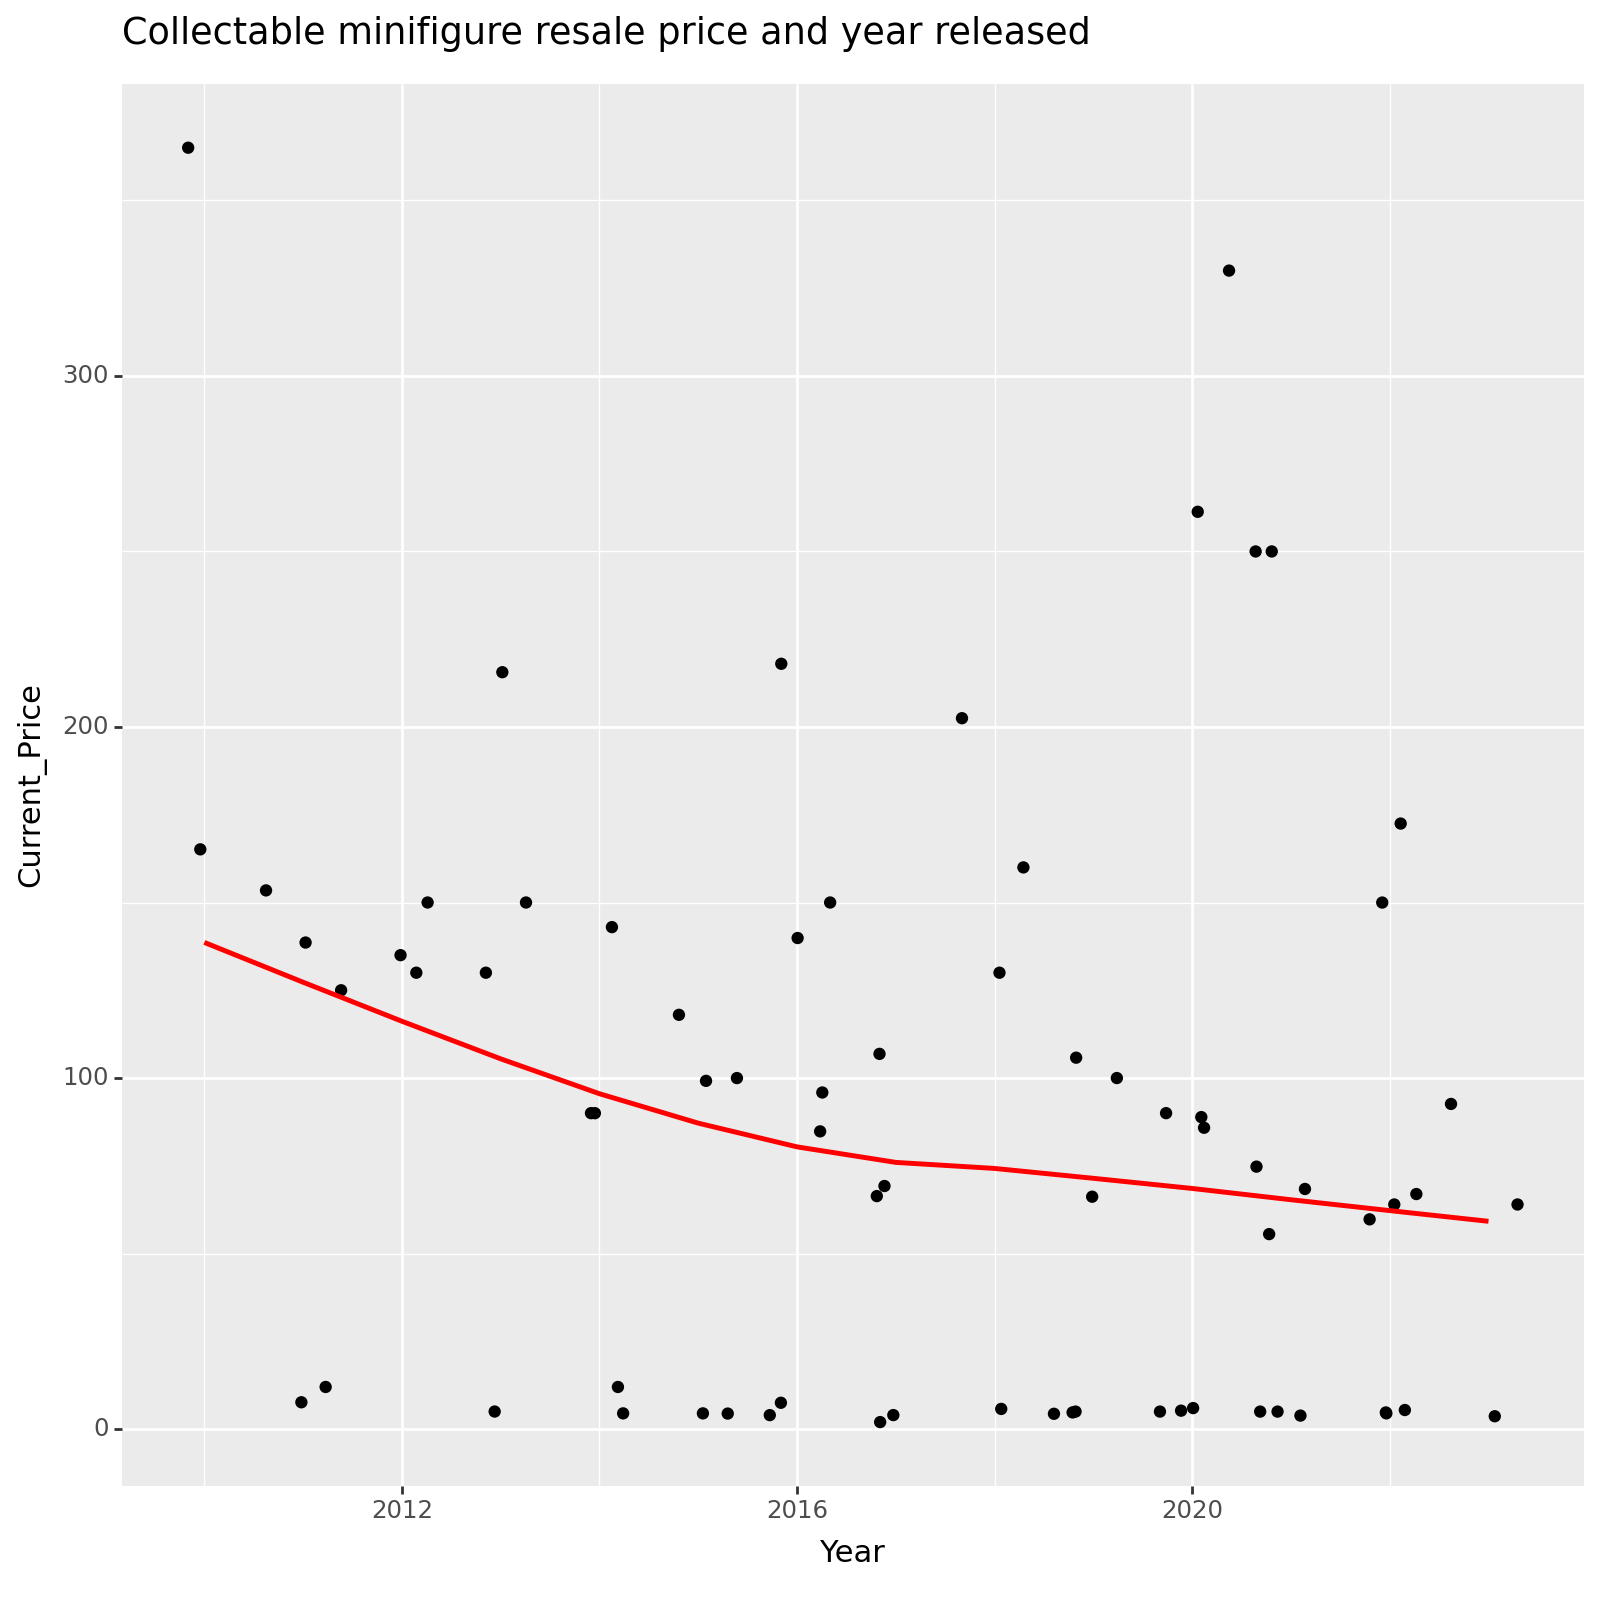

<Figure Size: (800 x 800)>

In [26]:
(p9.ggplot(
    data = minifigures_data, 
    mapping = p9.aes(x = 'Year', y = "Current_Price")
 )+ 
    p9.geom_point(position = 'jitter') +
    p9.geom_smooth(color = 'red') + 
    p9.ggtitle("Collectable minifigure resale price and year released") + 
    p9.theme(figure_size=(8, 8)))